<a href="https://colab.research.google.com/github/poornu1234/Car-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/car data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


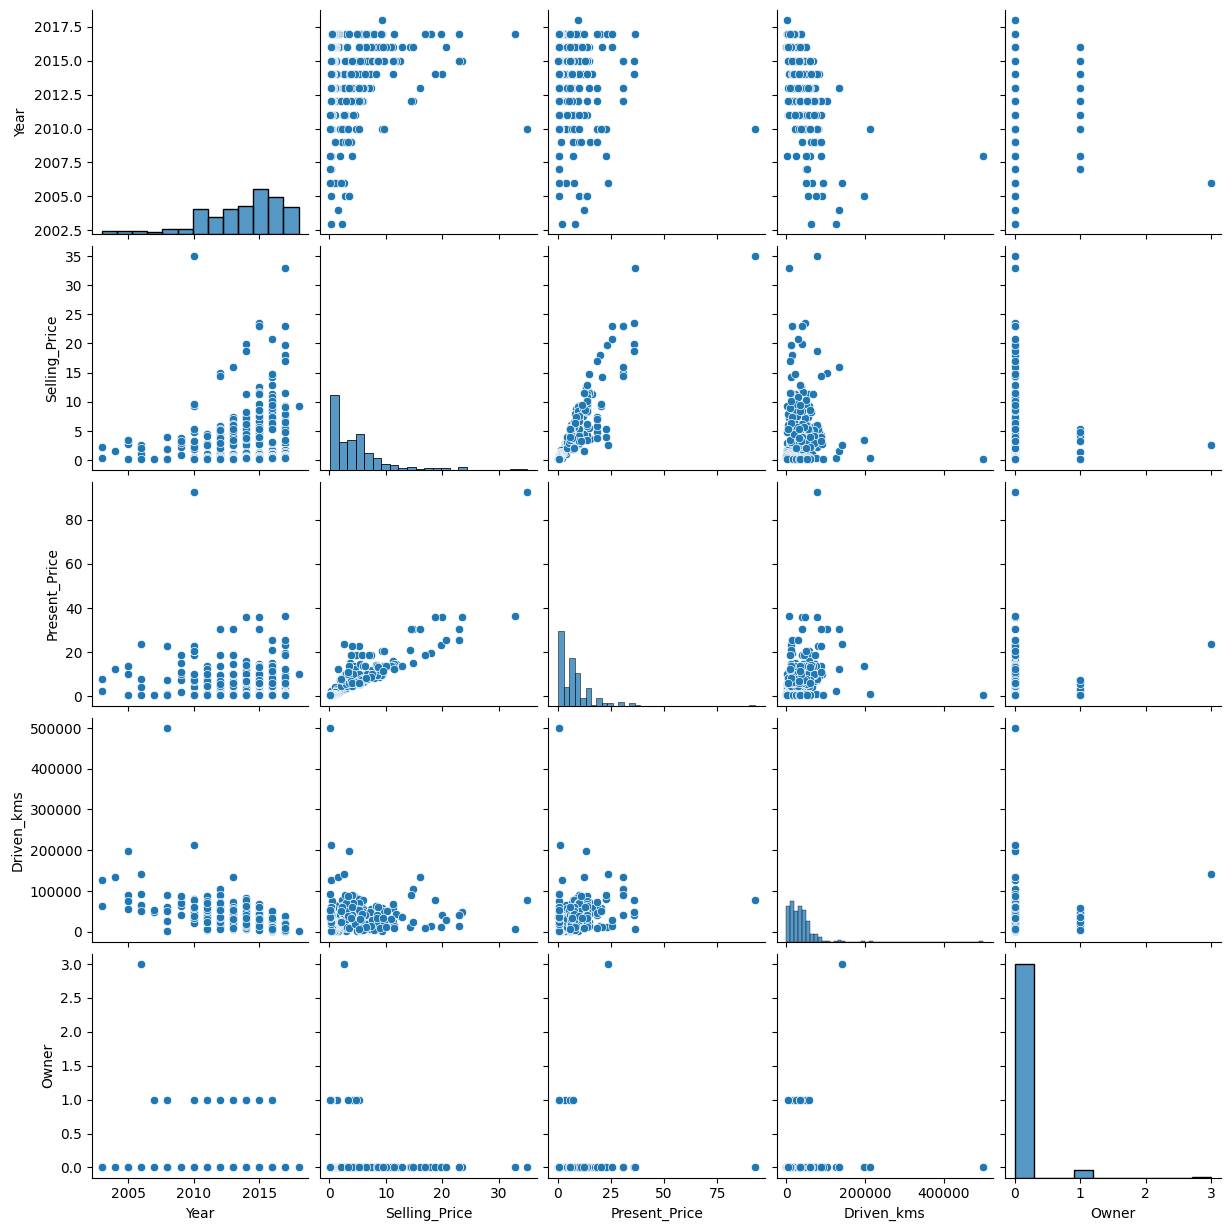

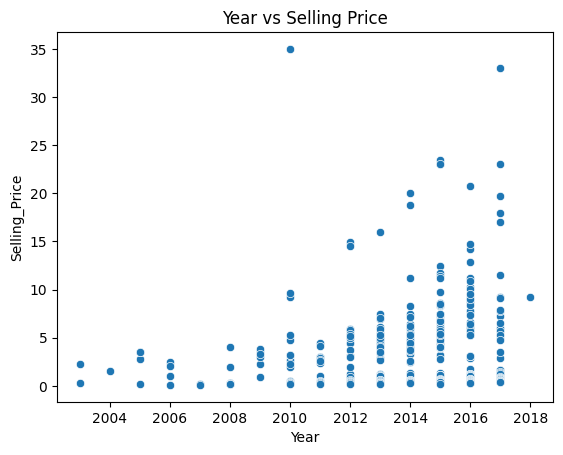

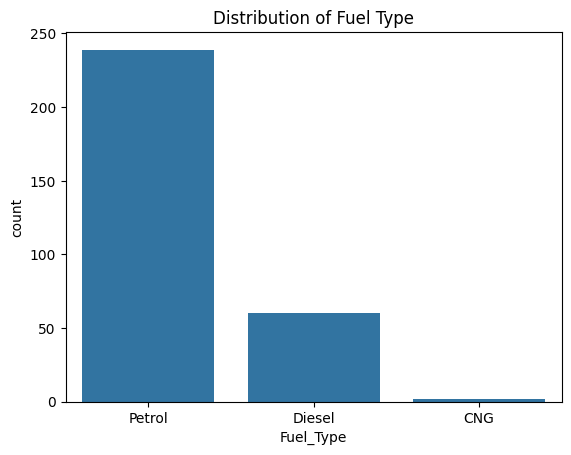

In [ ]:

df.info()

df.describe()


sns.pairplot(df)
plt.show()

sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.title('Year vs Selling Price')
plt.show()
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribution of Fuel Type')
plt.show()


In [ ]:

df.dropna(inplace=True)




X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)


rf_model.fit(X_train_scaled, y_train)


y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)


Train RMSE: 0.666292494392165
Test RMSE: 0.9857265401556421
Train MAE: 0.2872924999999997
Test MAE: 0.6449885245901641
Train R^2: 0.9832074466189166
Test R^2: 0.9578193116345124
